## <font color = blue>Case Study on Regression

### Import the necessary libraries & Load the dataset into python environment :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
data = pd.read_csv(r'C:\Users\sajee\Downloads\AATHIRA DSA\car_age_price.csv') 
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


### Perform data understanding and exploration:

In [3]:
data.shape

(112, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
data.dtypes

Year     int64
Price    int64
dtype: object

In [6]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


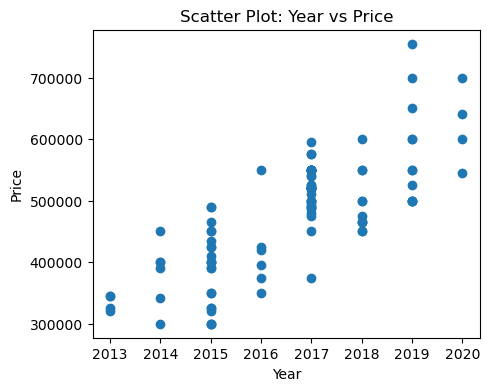

In [7]:
# Explore the relationship between Year and Price using a scatter plot:

plt.figure(figsize=(5, 4))  # Set the figure size
plt.scatter(data['Year'], data['Price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Scatter Plot: Year vs Price')
plt.show()

### Perform data cleaning and outlier detection:

In [8]:
# Check for missing values:

data.isna().sum()

Year     0
Price    0
dtype: int64

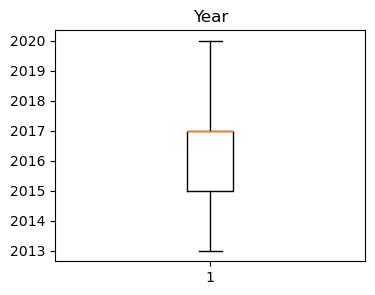

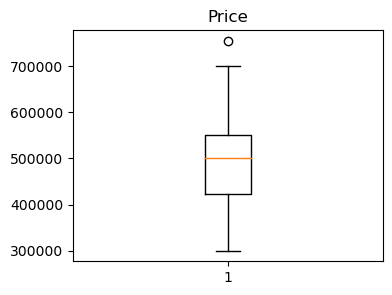

In [9]:
# Check for outliers:

num_cols = ['Year', 'Price']

for i in num_cols:
    plt.figure(figsize=(4,3))
    plt.boxplot(data[i])
    plt.title(i)

### Create a Heatmap to Visualize the Correlation:

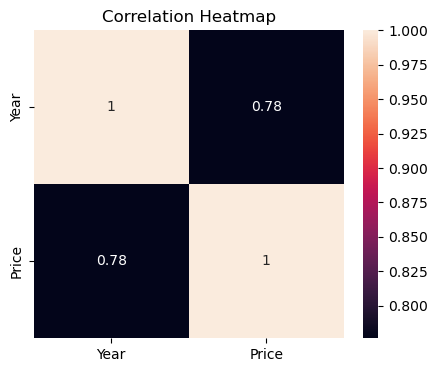

In [10]:
corrmatrix = data.corr()
plt.figure(figsize=(5, 4))
sns.heatmap(corrmatrix,annot = True)
plt.title('Correlation Heatmap')
plt.show()

### Preprocess the Data and Perform Scaling: 

In [11]:
data.columns 

Index(['Year', 'Price'], dtype='object')

In [12]:
# Here,"Year" is the feature variable and the values represent consecutive years,
# The magnitude itself does not impact the relationship with the price,
# Therefore, we can directly use the "Year" feature as it is without scaling for regression in this scenario.

In [13]:
# Split the data into independent variable (year) and dependent variable (price):

y = data ['Price']   # target variable
X= data.drop(['Price'],axis = 1) # features

In [14]:
# Split the scaled data into training and testing sets:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
# Display X_train, X_test:

X_train, X_test

(     Year
 81   2014
 77   2015
 15   2017
 30   2019
 45   2018
 ..    ...
 106  2015
 14   2017
 92   2017
 51   2018
 102  2015
 
 [84 rows x 1 columns],
      Year
 40   2019
 65   2017
 4    2018
 47   2018
 42   2018
 69   2015
 26   2017
 11   2018
 10   2019
 44   2019
 73   2013
 55   2017
 68   2015
 97   2020
 0    2018
 18   2019
 53   2013
 80   2015
 103  2017
 91   2017
 36   2017
 12   2017
 31   2017
 66   2017
 90   2017
 62   2017
 22   2015
 85   2015)

In [16]:
# Display y_train, y_test:

y_train, y_test

(81     390000
 77     325000
 15     500000
 30     650000
 45     450000
         ...  
 106    300000
 14     475000
 92     520000
 51     550000
 102    350000
 Name: Price, Length: 84, dtype: int64,
 40     525000
 65     495000
 4      465000
 47     450000
 42     550000
 69     300000
 26     550000
 11     500000
 10     500000
 44     550000
 73     320000
 55     550000
 68     465000
 97     640000
 0      465000
 18     500000
 53     345000
 80     390000
 103    375000
 91     520000
 36     550000
 12     500000
 31     550000
 66     525000
 90     520000
 62     540000
 22     434999
 85     320000
 Name: Price, dtype: int64)

### <font color = GREEN>Train and Evaluate the Linear Regression Model:

In [17]:
# Create and train the linear regression model:

lr = LinearRegression()
linear_model = lr.fit(X_train,y_train)

In [18]:
# Make predictions on the test set:

y_predict = linear_model.predict(X_test)

In [19]:
# Display y_predict:

y_predict

array([599223.07304104, 505265.04214995, 552244.05759549, 552244.05759549,
       552244.05759549, 411307.01125886, 505265.04214995, 552244.05759549,
       599223.07304104, 599223.07304104, 317348.98036776, 505265.04214995,
       411307.01125886, 646202.08848657, 552244.05759549, 599223.07304104,
       317348.98036776, 411307.01125886, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 411307.01125886, 411307.01125886])

In [20]:
# Display y_test:

y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
66     525000
90     520000
62     540000
22     434999
85     320000
Name: Price, dtype: int64

### Calculate the Error  for Linear Regression:

In [21]:
# Calculate the mean squared error (MSE) and  R-squared error:

linear_mse = mean_squared_error(y_test,y_predict)
linear_r2 = r2_score(y_test,y_predict)

print(linear_mse)
print(linear_r2)

3878767151.073449
0.4347961632108023


### <font color = GREEN> Train and Evaluate the Lasso Regression Model:

In [22]:
# Create and train the Lasso regression model:

l = Lasso()
lasso_model = l.fit(X_train, y_train)

In [23]:
# Make predictions on the test set:

y_predicted = lasso_model.predict(X_test)

In [24]:
# Display y_predicted:

y_predicted

array([599222.10828854, 505264.87581331, 552243.49205092, 552243.49205092,
       552243.49205092, 411307.64333805, 505264.87581331, 552243.49205092,
       599222.10828854, 599222.10828854, 317350.4108628 , 505264.87581331,
       411307.64333805, 646200.72452617, 552243.49205092, 599222.10828854,
       317350.4108628 , 411307.64333805, 505264.87581331, 505264.87581331,
       505264.87581331, 505264.87581331, 505264.87581331, 505264.87581331,
       505264.87581331, 505264.87581331, 411307.64333805, 411307.64333805])

In [25]:
# Display y_test:

y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
66     525000
90     520000
62     540000
22     434999
85     320000
Name: Price, dtype: int64

### Calculate the Error  for Lasso Regression Model:

In [26]:
# Calculate the mean squared error (MSE) and  R-squared error:

lasso_mse = mean_squared_error(y_test,y_predicted)
lasso_r2 = r2_score(y_test,y_predicted)

print(lasso_mse)
print(lasso_r2)

3878735896.222091
0.4348007175862566


### <font color = GREEN> Compare the performance of both Models.

In [27]:
# Print the mean squared error (MSE) & R-squared error for both models:

print("Linear Regression MSE:", linear_mse)
print("Linear Regression R2 Score:", linear_r2)
print("Lasso Regression MSE:", lasso_mse)
print("Lasso Regression R2 Score:", lasso_r2)

Linear Regression MSE: 3878767151.073449
Linear Regression R2 Score: 0.4347961632108023
Lasso Regression MSE: 3878735896.222091
Lasso Regression R2 Score: 0.4348007175862566


###### In terms of MSE, both Linear Regression and Lasso Regression models have similar values, indicating that they have similar prediction errors on the test set.When comparing the R2 score, which measures the proportion of the variance in the dependent variable explained by the independent variable(s), both models have similar scores.Overall,both Linear Regression and Lasso Regression models perform similarly in terms of prediction accuracy and explanatory power.

### <font color = GREEN>Train the selected model using the entire dataset:

In [28]:
selected_model = linear_model if linear_mse < lasso_mse else lasso_model

if selected_model == linear_model:
    print("Selected model: Linear Regression")
else:
    print("Selected model: Lasso Regression")

Selected model: Lasso Regression


In [29]:
selected_model.fit(X, y)

Lasso()

### <font color = GREEN>Predict the price for the 2022 model:

In [30]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [31]:
predicted_price_2022 = selected_model.predict([[2022]])

In [32]:
print("Predicted price of a 2022 model second-hand Grand i10 is Rupees:", predicted_price_2022[0])

Predicted price of a 2022 model second-hand Grand i10 is Rupees: 715486.0532485098


### Visualization of predicted price for 2022 and the regression line:

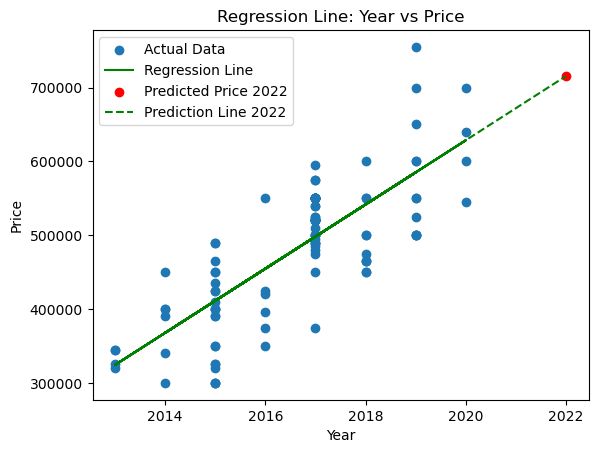

In [33]:
# Plot the scatter plot of "Year" vs "Price"
plt.scatter(X, y, label="Actual Data")

# Plot the regression line
plt.plot(X, selected_model.predict(X), color='green', label="Regression Line")

# Predict the price for the year 2022
year_2022 = [[2022]]
predicted_price_2022 = selected_model.predict(year_2022)

# Plot the predicted price for 2022 as a separate point
plt.scatter(year_2022, predicted_price_2022, color='red', label="Predicted Price 2022")

# Extend the regression line to the predicted price for 2022
X_min = X.min().values
X_2022 = year_2022[0]
y_min = selected_model.predict(X_min.reshape(-1, 1))
y_2022 = predicted_price_2022
plt.plot([X_min, X_2022], [y_min, y_2022], color='green', linestyle='--', label="Prediction Line 2022")

plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Regression Line: Year vs Price")
plt.legend()
plt.show()

#### <font color = magenta>Predicted price of a 2022 model second-hand Grand i10 is around Seven Lakh Fifteen Thousand Rupees Only